In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
iris = pd.read_csv('tableconvert_2019-11-21_093602.csv')

In [4]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [23]:
y = iris['petal.width']

In [24]:
x = iris['petal.length']

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

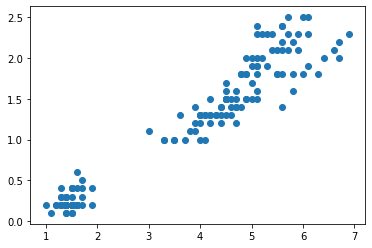

In [25]:
plt.scatter(x,y)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression(fit_intercept = True)

In [29]:
data_x = pd.DataFrame(x)
data_y = pd.DataFrame(y)

In [30]:
data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
    data_x, data_y, test_size=0.2, random_state=0)

In [31]:
lm.fit(data_x_opetus,data_y_opetus)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
predictions = lm.predict(np.arange(1,8,1).reshape(-1,1))

In [37]:
ennustukset_opetus = lm.predict(data_x_opetus)
opetus_mse = mean_squared_error(data_y_opetus, ennustukset_opetus)
print(opetus_mse)

0.037320274323933124


In [38]:
ennustukset_validointi = lm.predict(data_x_validointi)
validointi_mse = mean_squared_error(data_y_validointi, ennustukset_validointi)
print(validointi_mse)

0.06173633559649008


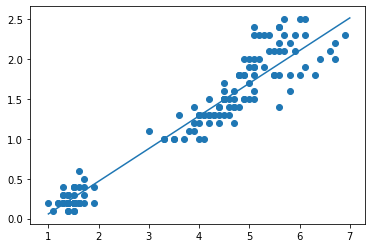

In [67]:
plt.plot(np.arange(1,8,1),predictions,'-')
plt.scatter(data_x,data_y)

In [49]:
opetus_mse = np.zeros(10)
opetus_r2 = np.zeros(10)

validointi_mse = np.zeros(10)
validointi_r2 = np.zeros(10)

for i in range(0,10):
    data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
        data_x, data_y, test_size=0.2, random_state=689*i)
    
    lm.fit(data_x_opetus, data_y_opetus)
    
    ennustukset_opetus = lm.predict(data_x_opetus)
    opetus_mse[i] = mean_squared_error(data_y_opetus, ennustukset_opetus)
    opetus_r2[i] = r2_score(data_y_opetus, ennustukset_opetus)
    
    ennustukset_validointi = lm.predict(data_x_validointi)
    validointi_mse[i] = mean_squared_error(data_y_validointi, ennustukset_validointi)
    validointi_r2[i] = r2_score(data_y_validointi, ennustukset_validointi)

In [53]:
print(opetus_mse)
print('\n')
print(np.mean(opetus_mse))

[0.03732027 0.0410925  0.04434428 0.04031219 0.04590944 0.04026746
 0.04579792 0.04331165 0.04491764 0.04232742]


0.042560076803314716


In [54]:
print(validointi_mse)
print('\n')
print(np.mean(validointi_mse))

[0.06173634 0.04605007 0.03328474 0.04943414 0.02881989 0.04998381
 0.02721824 0.03733449 0.0310821  0.04224352]


0.04071873366306859


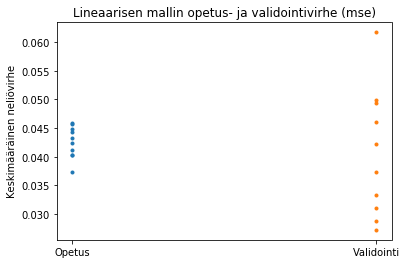

In [46]:
plt.plot(np.ones((10,1)), opetus_mse, '.')
plt.plot(2*np.ones((10,1)), validointi_mse, '.')

plt.title('Lineaarisen mallin opetus- ja validointivirhe (mse)')
plt.xticks([1,2], ['Opetus', 'Validointi'])
plt.ylabel('Keskimääräinen neliövirhe')

plt.show()

In [55]:
print(opetus_r2)
print('\n')
print(np.mean(opetus_r2))

[0.9373993  0.92757533 0.92375468 0.92680482 0.92097297 0.9327989
 0.92507702 0.92073714 0.92086973 0.92571204]


0.9261701941070901


In [56]:
print(validointi_r2)
print('\n')
print(np.mean(validointi_r2))

[0.87140942 0.92148177 0.93841354 0.92399425 0.94792108 0.8952097
 0.93715806 0.94378183 0.94941522 0.92978786]


0.925857274720339


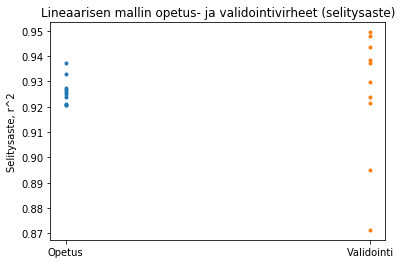

In [57]:
plt.plot(np.ones((10,1)), opetus_r2, '.')
plt.plot(2*np.ones((10,1)), validointi_r2, '.')

plt.title('Lineaarisen mallin opetus- ja validointivirhe (selitysaste)')
plt.xticks([1,2], ['Opetus', 'Validointi'])
plt.ylabel('Selitysaste, r^2')

plt.show()